Numberical simulation

In [19]:
import base, constant
import numpy as np, qiskit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import importlib
importlib.reload(constant)
importlib.reload(base)


<module 'base' from 'c:\\Users\\haime\\OneDrive\\Documents\\GitHub\\Lagrange interpolation approach for GPRX\\base.py'>

In [31]:
step_sizes = np.arange(10**(-2), 3, 2*10**(-2))
thetas_origin = np.asarray([np.pi/2, np.pi/3, np.pi/6])
thetas_x, thetas_z, thetas_y = thetas_origin
def u(qc, thetas):
    qc.rx(thetas[0], 0)
    qc.rz(thetas[1], 1)
    qc.cry(thetas[2], 0, 1)
    return qc
def f(thetas):
    qc = qiskit.QuantumCircuit(2,2)
    qc = u(qc, thetas)
    # qc = udagger(qc, thetas_origin)
    return base.measure(qc, [0, 1])



true_grad = base.true_grad(thetas_origin)
print(true_grad)
mean_grad_stds = []
mean_grad_finites = []
for step_size in step_sizes:
    print(step_size)
    grad_finites = []
    grad_stds = []

    for _ in range(0, 10):
        grad_finite = []
        grad_std = []
        for j in range(thetas_origin.shape[0]):
            if j != 2:
                grad_std.append(base.pseudo_two_prx(f, thetas_origin, j, step_size))
                # grad_finite.append(base.two_finite_diff(f, thetas_origin, j, step_size))
            else:
                grad_std.append(base.pseudo_four_prx(f, thetas_origin, j, step_size))
            grad_finite.append(base.two_finite_diff(f, thetas_origin, j, step_size))
        grad_finites.append(grad_finite)
        grad_stds.append(grad_std)
    
    mean_grad_stds.append(np.mean(grad_stds,axis = 0))
    mean_grad_finites.append(np.mean(grad_finites,axis = 0))
np.savetxt('mean_grad_stds.txt', mean_grad_stds)
np.savetxt('mean_grad_finites.txt', mean_grad_finites)


[-0.25       0.4330127  0.       ]
0.01
0.03
0.049999999999999996
0.06999999999999999
0.08999999999999998
0.10999999999999997
0.12999999999999998
0.15
0.16999999999999998
0.18999999999999997
0.20999999999999996
0.22999999999999998
0.24999999999999997
0.26999999999999996
0.29
0.30999999999999994
0.32999999999999996
0.35
0.36999999999999994
0.38999999999999996
0.4099999999999999
0.42999999999999994
0.44999999999999996
0.4699999999999999
0.48999999999999994
0.5099999999999999
0.5299999999999999
0.5499999999999999
0.57
0.59
0.6099999999999999
0.6299999999999999
0.6499999999999999
0.6699999999999999
0.69
0.7099999999999999
0.7299999999999999
0.7499999999999999
0.7699999999999999
0.7899999999999999
0.8099999999999998
0.8299999999999998
0.8499999999999999
0.8699999999999999
0.8899999999999999
0.9099999999999999
0.9299999999999998
0.9499999999999998
0.9699999999999999
0.9899999999999999
1.0099999999999998
1.0299999999999998
1.0499999999999998
1.0699999999999998
1.0899999999999999
1.10999999999

In [32]:
step_sizes = np.arange(10**(-2), 1, 10**(-1))
mean_grad_stds = np.asarray(np.loadtxt('mean_grad_stds.txt'))
mean_grad_finites = np.asarray(np.loadtxt('mean_grad_finites.txt'))
e_std = []
for i in range(0, mean_grad_stds.shape[0]):
    e_std.append(mean_squared_error(mean_grad_stds[i], mean_grad_finites[i]))

In [43]:
mean_grad_stds.shape

(150, 3)

### Mean 

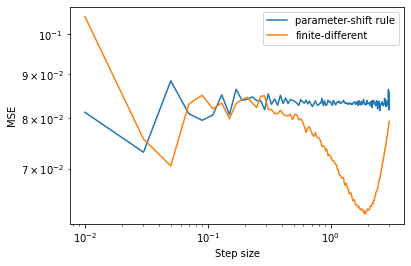

In [44]:
e_std, e_finite = [], []
step_sizes = np.arange(10**(-2), 3, 2*10**(-2))
for i in range(0, mean_grad_stds.shape[0]):
    e_std.append(mean_squared_error(mean_grad_stds[i], true_grad))
    e_finite.append(mean_squared_error(mean_grad_finites[i], true_grad))
plt.plot(step_sizes, e_std, label = "parameter-shift rule")
plt.plot(step_sizes, e_finite,  label = "finite-different")

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.legend()

### X

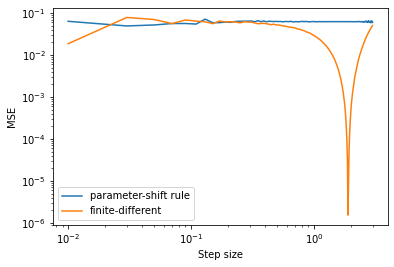

In [45]:
e_std_x, e_finite_x = [], []
for i in range(0, step_sizes.shape[0]):
    e_std_x.append(mean_squared_error([mean_grad_stds[i][0]], [true_grad[0]]))
    e_finite_x.append(mean_squared_error([mean_grad_finites[i][0]], [true_grad[0]]))
plt.plot(step_sizes, e_std_x, label = "parameter-shift rule")
plt.plot(step_sizes, e_finite_x,  label = "finite-different")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.legend()

### Y

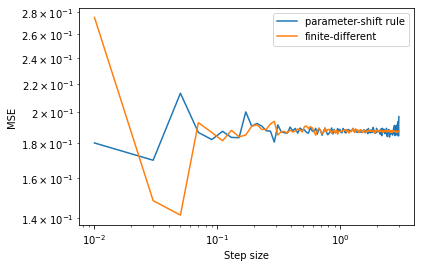

In [46]:
e_std_y, e_finite_y = [], []
for i in range(0, step_sizes.shape[0]):
    e_std_y.append(mean_squared_error([mean_grad_stds[i][1]], [true_grad[1]]))
    e_finite_y.append(mean_squared_error([mean_grad_finites[i][1]], [true_grad[1]]))
plt.plot(step_sizes, e_std_y, label = "parameter-shift rule")
plt.plot(step_sizes, e_finite_y,  label = "finite-different")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.legend()